# Python入門講座(第12回)：数式処理(sympy)

pythonの強みの一つは世界中の開発者によって開発された豊富なライブラリ(モジュール）です。

数値処理には、基本的な機能を提供し、その他のモジュールのベースとして広く使われている`numpy`、グラフ生成の`matplotlib`,
それらの基盤の上に構築された高機能な`pandas`などがよく使われます。また、機械学習の分野では`TensorFlow`,`PyTorch`, `Keras`などが知られています。

Pythonには数値計算だけでなく, `Mathematica`や`maxima`のように数式を記号のまま取り扱うモジュール, `sympy` も存在しています。
つまり、`sympy`　では、次の例のように（数値ではなく）数式そのものを取り扱うことができます。

## sympyの見本
sympyでの処理の例をみてみましょう。

In [1]:
from sympy import *
var('x')
expr=(x+1)*(x-1)
expr

(x - 1)*(x + 1)

数式を展開することもできます。

In [2]:
expr.expand()

x**2 - 1

逆に因数分解することも、

In [3]:
_.factor()

(x - 1)*(x + 1)

三角関数を含む式の変換だって、

In [4]:
expr=sin(x)*cos(x)
expr.simplify()

sin(2*x)/2

## [`sympy`][sympy documentation]でできること

[`sympy`][sympy documentation]には次のような機能があります([sympy チュートリアル])。 

    * 数式処理：数式の展開(expand), 整理(simplify)、因数分解(factor)
    * 方程式の解を求める。 (solve)
    * 式のままの微分、積分 (diff, integrate)
    * 行列計算 (Matrix)
    * プロット (plot, plot_implicit, plot_parametric,...)
    * その他 (physics, control, ....)
[sympy チュートリアル]: http://certik.github.io/scipy-2013-tutorial/html/tutorial/basic_operations.html
[sympy documentation]: https://docs.sympy.org/latest/index.html

というように数式そのものを計算対象として取り扱えます。

## [SympyとSageMath][SympyとSageの違い]

pythonをベースにした数式処理システムとして`SageMath`もよく知られています。

`SageMath`は:

1. `Jupyter`を使った`Mathematica`ライクな`Notebook`インタフェースを備えたシステムです。
1. `sage`コマンドでコマンドラインからの利用もできます。
1. `SageMath`は`sympy`や`maxima`,`R`など複数のライブラリを統合して、一つのシステムとしてまとめ上げています。 
1. プログラム言語としては`python`を基本としていますが、数式処理に合わせた拡張(変更）が行われた独自の言語となっています。

[SympyとSageの違い]: https://stackoverflow.com/questions/17847902/what-is-the-difference-between-sympy-and-sage

[isympyはIPythonをつかったsympy実行環境]: https://docs.sympy.org/latest/modules/interactive.html?highlight=isympy

今回は `sympy`を使ったpythonでの数式処理だけをご紹介します。

## `sympy`を使うための準備
### `sympy`のインストール
`sympy`は標準配布には含まれていないので、利用環境毎にインストールが必要です。

インターネットに接続された計算機環境で、
``` shell
python3 -m pip install sympy
```
を実行します。

### モジュールのインポート
`sympy`を利用するpythonプログラムでは、`sympy`をインポートしておきます。

In [5]:
import sympy
from sympy import var, solve, dsolve, plot, Matrix # from sympy import *　でもよい
from sympy import plot, plot_implicit, plot_parametric

###  モジュールのバージョン
モジュールのバージョンは、そのモジュールの "\_\_version\_\_" で確認します。
(Python処理系のバージョンは、sys.version_infoなどで確認します。）

インターネット上のドキュメントを利用する際には、そのドキュメントが対象とするバージョンと利用中のモジュールのバージョン
が一致していることを、確認しましょう。

In [6]:
print("sympy version:", sympy.__version__)
import sys
sympy.__version__, sys.version_info, sys.version

sympy version: 1.9


('1.9',
 sys.version_info(major=3, minor=9, micro=10, releaselevel='final', serial=0),
 '3.9.10 (v3.9.10:f2f3f53782, Jan 13 2022, 16:55:45) \n[Clang 13.0.0 (clang-1300.0.29.30)]')

# `sympy`を使ってみよう。

## `sympy`のシンボル（数式中の変数を表す記号）

  * `sympy`で数式を操作する際には、数式の中に現れる記号(シンボル）の名前 (例えば、$x^2 - y^2$ の $x$ や $y$ ) を宣言しておく必要があります。 これには通常`var`関数が使われます。
    * `var`関数の引数は数式で使われる変数名(`Symbol`)を並べた文字列です。
    * 文字列では、空白あるいはコンマ(',')を区切り文字として使い複数のシンボル名を一度に宣言できます。
  *`var()`を実行すると、文字列中の変数名のシンボルが作成され、**同名のpythonの変数**に割り当てられます。

In [7]:
#数式で使用するシンボルを定義します。
from sympy import var,symbols
var('x y z t')

(x, y, z, t)

In [8]:
type(x),x.name

(sympy.core.symbol.Symbol, 'x')

In [9]:
var('a b c d')
print( a*b + c*d)
a*b + c*d # jupyter+sympy では出力をLaTex形式を使って表示します。

a*b + c*d


a*b + c*d

`var`関数呼び出しは、`<name> = symbols("<name>")`と等価です。

In [10]:
var('a')
asym=symbols('a')
aSym=Symbol('a')
a+asym+aSym

3*a

pythonの変数 `a` には名前が 'a'であるSymbolオブジェクトが割り当てられていることを確認してみましょう。

In [11]:
type(a), a.name

(sympy.core.symbol.Symbol, 'a')

`symbols()`は`var()`と同じく複数の記号名を登録できます。

`Symbol()`は一つのシンボルだけを登録します。

In [12]:
a,b,c,d=symbols('a b c d')

In [13]:
abcd=Symbol('a b c d')
((a+a*b*c*d)**2+a*abcd).factor()

a*(a*b**2*c**2*d**2 + 2*a*b*c*d + a + a b c d)

### 注意：

* pythonの変数名`a`と`Symbol` 'a'の関係は固定されたものではないことに注意しましょう。
* pythonの変数`a`はいつでも別のオブジェクトに再割り当てすることができます。

In [14]:
var('a b c')
u=a; v=b
print(type(u),u.name)
u*(a+v)

<class 'sympy.core.symbol.Symbol'> a


a*(a + b)

## LaTeX表示
* Notebook環境では、セルの値となる数式はLaTeX(MathJax)を使った数式として表示されます。
* `sympy`の`latex`関数を使って、数式のLaTex表現の文字列を入手できます。

In [15]:
from sympy import latex
var('a b c d')
print((sqrt(a*b + c*d)))
print(latex(sqrt(a*b + c*d)))
sqrt(a*b + c*d)

sqrt(a*b + c*d)
\sqrt{a b + c d}


sqrt(a*b + c*d)

### ギリシャ文字
名前がギリシャ文字名のシンボルは、jupyter Notebookではギリシャ文字で表示されます。
$\lambda$(`\lambda`)を使う際にはpythonの予約語`lambda`との衝突を避けるため、`lambda_`とするなどの注意が必要です。

In [16]:
var('x y z t u v varphi alpha phi ell rho lambda_  Alpha Beta Gamma_mu ') # lambda_は予約語lambdaとの衝突をさけるため
sin(varphi)**2 * alpha * cos(phi) + ell * tan(rho) * sqrt(lambda_) + Alpha*Beta*Gamma_mu

Alpha*Beta*Gamma_mu + alpha*sin(varphi)**2*cos(phi) + ell*sqrt(lambda_)*tan(rho)

`Symbol`関数を使うことで、変数名とシンボルとして印刷されるときの名前を変えておくこともできます。

In [17]:
lambda_=Symbol("\lambda")
lambda_**2

\lambda**2

LaTeXあるいはMathJaxで結果を利用したい場合には `latex()`関数でLaTeX表記の文字列を入手しましょう。

In [18]:
print(latex(sin(varphi)**2 * alpha * cos(phi) + ell * tan(rho) * sqrt(lambda_) ))

\sqrt{\lambda} \ell \tan{\left(\rho \right)} + \alpha \sin^{2}{\left(\varphi \right)} \cos{\left(\phi \right)}


余談::
ギリシャ文字あるいはアルファベットの一文字を名前とするシンボルは`sympy.abc`モジュールに定義済みです。 `sympy.abc._clash`に含まれる名前は,`sympy`で定義されている変数と`sympy.abc`で定義されている名前で競合が発生するので、注意が必要です。

In [19]:
import sympy.abc
sympy.abc._clash.keys()

dict_keys(['O', 'Q', 'N', 'I', 'E', 'S', 'beta', 'zeta', 'gamma', 'pi'])

## 式の展開(`expand`)、整理(`simplify`)、因数分解(`factor`)
記号として $x$, $y$ を使った数式を考えてみます。

In [20]:
var('x y')
expr=(x**2 + x*y + y**2)*(x-y)
expr

(x - y)*(x**2 + x*y + y**2)

このように、sympyでは数式自体が計算結果となります。
`type()`関数で調べてみると、`expr`の中身は数値ではなく、`sympy`のオブジェクトであることがわかります(ここでは、`sympy.core.mul.Mul`オブジェクトなっています)。

In [21]:
type(expr)

sympy.core.mul.Mul

この数式を展開(`.expand()`)してみましょう。

In [22]:
expr=expr.expand()
expr

x**3 - y**3

In [23]:
print(type(expr))

<class 'sympy.core.add.Add'>


この式は`sympy.core.add.Add`オブジェクトになっています。多項式は、積(`sympy.core.mul.Mul`)で作られた単項を足し合わせ(`sympy.core.add.Add`)て作られていることがわかります。

此の式を因数分解(`.factor()`)してみると、

In [24]:
expr=expr.factor()
print(type(expr))
expr

<class 'sympy.core.mul.Mul'>


(x - y)*(x**2 + x*y + y**2)

となります。なお、`factor`, `expand`は関数としても利用できます。

In [25]:
expand(expr)

x**3 - y**3

In [26]:
factor(expand(expr))

(x - y)*(x**2 + x*y + y**2)

### 数式の整理:simplify()
式の簡素化に`.simplify()`メソッドが用意されています。

In [27]:
expr.simplify()

x**3 - y**3

## 変数への代入(substitute)
式の変数を別の値で置き換えた式をつくるには、`.subs`メソッドを使います。
式中の変数$x$を数値$123$に置き換えてみましょう。

In [28]:
expr= x**2 + 3*x + 2
expr.subs(x, 123)

15500

式中の変数$x$を別の数式で置き換えることも可能です。式に現れる一部の項だけを置き換えることも可能です。

In [29]:
expr.subs({x:2+y}) #置換ルールを辞書型データで指定しています。

3*y + (y + 2)**2 + 8

In [30]:
expr.subs({x:2+y, y:4})

56

In [31]:
expr.subs({x**2:y,y:(x+1)**3})

3*x + (x + 1)**3 + 2

In [32]:
expr.subs(3*x+2, y )

x**2 + y

## 三角関数を含む数式の整理
三角関数を含む数式の整理には、`trigsimp()`や`expand_trig()`関数を使うことができます。

In [33]:
expr=cos(2*x) + sin(2*x)
expr

sin(2*x) + cos(2*x)

三角関数専用の簡素化を行う関数`trigsimp()`や展開関数`expand_trig`が用意されています。

In [34]:
trigsimp(expr)

sqrt(2)*sin(2*x + pi/4)

In [35]:
expand_trig(expr)

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [36]:
expr=cos(2*x) + 2*sin(x)*cos(x)
expr.simplify()

sqrt(2)*sin(2*x + pi/4)

In [37]:
expand_trig(expr)

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [38]:
expand_trig(expr).simplify()

sqrt(2)*sin(2*x + pi/4)

In [39]:
expr.rewrite(cos)

2*cos(x)*cos(x - pi/2) + cos(2*x)

In [40]:
expr.as_terms()

([(2*sin(x)*cos(x), ((2.0, 0.0), (1, 1, 0), ())),
  (cos(2*x), ((1.0, 0.0), (0, 0, 1), ()))],
 [sin(x), cos(x), cos(2*x)])

##　方程式の解
2次方程式 $a x^2 + b x + c = 0$ の解を`sympy`を使って求めてみましょう。

まず、$x$についての2次の多項式を作ります。

In [41]:
var('a b c x')
expr=a*x**2 + b* x + c
expr

a*x**2 + b*x + c

`solve()`関数は与えらてた数式を`0`とする解があれば、それらの解のリストを返します。

In [42]:
sols=solve(expr, x)
sols

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

`Eq()`クラスを使って、方程式 $expr = 0$ を明示的に表現することもできます。

In [43]:
Eq(expr,0)

Eq(a*x**2 + b*x + c, 0)

In [44]:
solve(Eq(expr,0),x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

解を辞書型や集合型のデータとして求めることも可能です。

In [45]:
sols_dict=solve(expr, x, dict=True)
sols_dict

[{x: (-b + sqrt(-4*a*c + b**2))/(2*a)}, {x: -(b + sqrt(-4*a*c + b**2))/(2*a)}]

In [46]:
sols_set=solve(expr, x, set=True)
sols_set

([x],
 {((-b + sqrt(-4*a*c + b**2))/(2*a),), (-(b + sqrt(-4*a*c + b**2))/(2*a),)})

### 方程式の解の確認
解(`sols`)の一つを、方程式に代入(substitute)してみます。

In [47]:
expr.subs(x,sols[0])

c + b*(-b + sqrt(-4*a*c + b**2))/(2*a) + (-b + sqrt(-4*a*c + b**2))**2/(4*a)

式を整理してみると、方程式を満足していることがわかります。

In [48]:
expr.subs(x,sols[1]).simplify()

0

辞書型で求めた解の一つを代入する時には、次のように書きます。

In [49]:
expr.subs(sols_dict[0])

c + b*(-b + sqrt(-4*a*c + b**2))/(2*a) + (-b + sqrt(-4*a*c + b**2))**2/(4*a)

In [50]:
expr.subs(sols_dict[0]).simplify()

0

二つの解がどちらも方程式を満たしていることを,リスト内包表記 `[<expr> for i in <list>]`をつかって 確認してみます。

In [51]:
[expr.subs(sol).simplify() == 0 for sol in sols_dict]

[True, True]

等式(`Eq`)を使った場合はこちら。

In [52]:
[Eq(expr, 0).subs(sol).simplify() for sol in sols_dict]

[True, True]

set型の戻り値を使った場合は、このようになるでしょう。

In [53]:
[expr.subs(sols_set[0][0],sol[0]).simplify() == 0 for sol in sols_set[1]]

[True, True]

## 一連の変数名をまとめて作る。
`sympy`では `var()`や`symbols()`に与える文字列の中にスライス記法をつかって一連の変数名をまとめて宣言できます。
Symbolとしての名前は、LaTeXのルールに従うので、"_"を含む名前は下付き文字を使って表現されます。

In [54]:
var("a_:3 b_:2(:2)") # sympyのsymbols/varでは複数のシンボルをスライス記法を用いて指示できます。

(a_0, a_1, a_2, b_00, b_01, b_10, b_11)

In [55]:
print(latex(a_0+a_1*x+ a_2*x**2))
a_0+a_1*x+ a_2*x**2 +b_11 # jupyter環境では`_`は下付き指標に整形されます。

a_{0} + a_{1} x + a_{2} x^{2}


a_0 + a_1*x + a_2*x**2 + b_11

LaTeXで上付き文字を指定する `^`はpythonの変数名の中で使うことができません。この場合には、`sympy()`の`symbols()`を使うことになります。　(`c^0`などを直接 pythonの変数名とすることはできません）

In [56]:
c0,c1,c2,d00,d01,d10,d11=symbols("c^:3 d^:2(:2)") #
c0.name

'c^0'

In [57]:
a_0*c0+a_1*c1

a_0*c^0 + a_1*c^1

## 行列(`Matirx`)
`Matrix`オブジェクトを作ることで、行列計算も行えます。

## 行列の演算
行列オブジェクトの和、積を求めてみましょう。

In [58]:
var("a_:2(:2) b_:2(:2)")

m=Matrix(
    ((a_00,a_01),
     (a_10,a_11)
    )
)
n=Matrix(((b_00,b_01),(b_10,b_11)))
m+n

Matrix([
[a_00 + b_00, a_01 + b_01],
[a_10 + b_10, a_11 + b_11]])

In [59]:
m*n

Matrix([
[a_00*b_00 + a_01*b_10, a_00*b_01 + a_01*b_11],
[a_10*b_00 + a_11*b_10, a_10*b_01 + a_11*b_11]])

### 行列式、逆行列, 転置行列

In [60]:
m.det() #行列式

a_00*a_11 - a_01*a_10

In [61]:
m.transpose() # 転置行列

Matrix([
[a_00, a_10],
[a_01, a_11]])

In [62]:
(m**(-1)).subs(det(m), 1) # 行列式が1の行列の逆行列

Matrix([
[ a_11, -a_01],
[-a_10,  a_00]])

In [63]:
simplify(m*m**(-1))

Matrix([
[1, 0],
[0, 1]])

## 行列式、トレース

In [64]:
m.det()

a_00*a_11 - a_01*a_10

In [65]:
m.trace()

a_00 + a_11

### 複素共役、エルミート共役
各種の共役行列も求めることができます。

In [66]:
m.conjugate() #複素共役

Matrix([
[conjugate(a_00), conjugate(a_01)],
[conjugate(a_10), conjugate(a_11)]])

In [67]:
 m.adjoint() #随伴行列/エルミート共役

Matrix([
[conjugate(a_00), conjugate(a_10)],
[conjugate(a_01), conjugate(a_11)]])

In [68]:
simplify(m* m.adjoint())

Matrix([
[a_00*conjugate(a_00) + a_01*conjugate(a_01), a_00*conjugate(a_10) + a_01*conjugate(a_11)],
[a_10*conjugate(a_00) + a_11*conjugate(a_01), a_10*conjugate(a_10) + a_11*conjugate(a_11)]])

##  近似値, 定数, 有理数
sympyの数式が表す数値の近似値を`.evalf()`メソッドを用いて求めることができます。引数で、有効桁数を指定します。
`.evalf()`メソッドの短縮形として、`.n()`メソッドを使うこともできます。`N(expr, n)`関数は`expr.evalf(n)`と等価です。

In [69]:
sin(1).evalf(10), sin(1).evalf(20), sin(1).evalf(30)

(0.8414709848, 0.84147098480789650665, 0.841470984807896506652502321630)

In [70]:
cos(1).n(20),tan(1).n(40)

(0.54030230586813971740, 1.557407724654902230506974807458360173087)

In [71]:
pi.n(10), E.evalf(20) # piは円周率, E=exp(1)=E1

(3.141592654, 2.7182818284590452354)

### 有理数(`Rational`クラス)
`sympy`はPythonの文法に従いますので、`1/3`などの式は`float`として評価されてしまいます。
有理数として`1/3`を取り扱うための`Rational`クラスが用意されています。また、Singleton リポジトリ関数`S()`を使って、
有理数を作りだすこともできます。

In [72]:
1/3, Rational(1,3), 1/3 == Rational(1,3)

(0.3333333333333333, 1/3, False)

In [73]:
Rational(1,3) + Rational(1/2) + Rational(1,3)/Rational(1/2) 

3/2

In [74]:
Integer(1)/Integer(3) == Rational(1,3)

True

`SageMath`とは異なり、`sympy`では有理数を取り扱うためには、明示的に`Rational()`,`Interger()`クラスを使う必要があります。

In [75]:
(x+1/3)**10 

(x + 0.333333333333333)**10

In [76]:
(x+Rational(1,3))**3

(x + 1/3)**3

In [77]:
((x+1)/(x+3)).subs(x,0)

1/3

In [78]:
(1+x/S(10))**10

(x/10 + 1)**10

In [79]:
type(S(1)), type(sympify(3)), type(Rational(1,3)), type(1/Integer(3))

(sympy.core.numbers.One,
 sympy.core.numbers.Integer,
 sympy.core.numbers.Rational,
 sympy.core.numbers.Rational)

注:: `sympy.S`はSingletonを管理するクラス。`S()`は`sympify()`と等価(`simplify()`の描き間違いではありません）。

In [80]:
((3*x+1)/3)**10

(x + 1/3)**10

### 極限値
$\lim_{x\rightarrow \infty} f(x)$のような極限値を求めることも可能です。

In [81]:
expr=(1+1/x)**x
expr.limit(x,oo) #sympy.core.numbers.Exp1

E

In [82]:
sin(x).nseries(x,0,n=10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

### 無限大
無限大を表す記号として、`oo`を使います。`oo`は`sympy.core.numbers.Infinity`に割り当てられています。

## 整数の素因数分解
数式（多項式）の因数分解だけでなく、整数の素因数分解(`factorint`)の機能も使えます。

In [83]:
factorint(5120,verbose=True,multiple=False) 

Factoring 5120
Trial division with ints [2 ... 32768] and fail_max=600
	2 ** 10
Factorization is complete.


{2: 10, 5: 1}

In [84]:
factorint(5120, visual=True)

2**10*5**1

In [85]:
import random
ri=random.randint(1,100000)
print(ri)
factorint(ri)

81840


{2: 4, 3: 1, 5: 1, 11: 1, 31: 1}

## 最小公倍数、最大公約数, 素数チェック

In [86]:
gcd(447550424579,304874938368000)

1

In [87]:
lcm(447_550_424_579, 304874_938_368_000) == 447550424579*304874938368000

True

In [88]:
isprime(447550424579), isprime(2850639647)

(False, True)

In [89]:
factorint(447550424579), factorint(304874938368000)

({157: 1, 2850639647: 1}, {2: 16, 3: 7, 5: 3, 7: 1, 11: 1, 13: 1, 17: 1})

## 連立方程式を解く。
鶴亀(蟻)算を例に、連立一次方程式を解いてみます。
問題は：

 * 鶴亀蟻が全部で10体、
 * 足の総数は34本、
 * 亀は蟻の数より一匹多い
  
という時の鶴、亀、蟻の数を求めよ
  
というものです。`eqs`の各要素が0になる解を求めます。

In [90]:
var('鶴　亀　蟻')
eqs=[ 2*鶴+4*亀+6*蟻 - 34, 鶴+亀+蟻 - 10,  蟻 + 1 - 亀 ]

In [91]:
sol=solve( eqs, (鶴, 亀, 蟻))
sol

{鶴: 5, 亀: 3, 蟻: 2}

### `Eq()`を使う
等式を表現する`Eq()`関数を使って、解くべき方程式を表現することも可能です。

In [92]:
Eq(2*鶴+4*亀+6*蟻 , 34)

Eq(4*亀 + 6*蟻 + 2*鶴, 34)

In [93]:
eqs=[Eq( 2*鶴 + 4*亀 + 6*蟻 , 34), #足が全部で34本
     Eq( 鶴 + 亀 + 蟻       , 10), #全部で10体
     Eq( 蟻 + 1            , 亀) ] # 亀は蟻より1多い
sol=solve( eqs, (鶴, 亀, 蟻))
sol

{鶴: 5, 亀: 3, 蟻: 2}

解`sol`を方程式に代入して、確かに解になっていることを確認します。

In [94]:
Eq(2*鶴 + 4*亀 + 6*蟻 , 34).subs(sol)

True

In [95]:
[eq.subs(sol) for eq in eqs]

[True, True, True]

## 微分、積分
数式の微分、積分も記号のまま実行します。

微分は数式オブジェクトの".diff()`メソッドで求めます。

In [96]:
expr=x**2+ sin(x)**3
expr.diff(x)

2*x + 3*sin(x)**2*cos(x)

`diff()`関数、`Derivative`クラスも使えます

In [97]:
diff(expr,x)

2*x + 3*sin(x)**2*cos(x)

`Derivative`クラスは式に対する微分の操作を表現します。

In [98]:
Derivative(expr,x)

Derivative(x**2 + sin(x)**3, x)

`.doit`メソッドで微分操作を実行します。

In [99]:
Derivative(expr,x).doit()

2*x + 3*sin(x)**2*cos(x)

## 積分／定積分

`.integrate()`メソッドで積分を実行します。

In [100]:
expr=(x**2-2*x-2)/(x**3-1)
expr.integrate(x)

-log(x - 1) + log(x**2 + x + 1)

`integrate()`関数をつかうこともできます。

In [101]:
integrate(expr,x)

-log(x - 1) + log(x**2 + x + 1)

被積分関数`expr`を部分分数展開すると、この積分が正しいことは一目瞭然です。

In [102]:
expr.apart()

(2*x + 1)/(x**2 + x + 1) - 1/(x - 1)

### 定積分
定積分には、変数範囲をタプルで指定します( `(<var>,<lower range>,<upper range>)`。`sympy`では`oo`は無限大を表します。

In [103]:
integrate(exp(-x**2), (x, -oo, oo) )

sqrt(pi)

In [104]:
(exp(-x**2)).integrate((x,-oo,oo))

sqrt(pi)

### 積分クラス
`Integral`クラスは積分の数式を表現します。(`Eq`が等式を表現するクラスであったのと同じです）

In [105]:
expr=Integral(exp(-x**2), (x, -oo, oo))
expr

Integral(exp(-x**2), (x, -oo, oo))

### 積分の実行
積分クラスの積分を実行した結果を求めるには`.doit()`メソッドを使います。

In [106]:
expr=Integral(exp(-x**2), (x, -oo, oo))
expr.doit()

sqrt(pi)

## 関数の微分
`Function`クラスは関数を表すオブジェクトを作成します。

In [107]:
f=Function('f') # `f`は関数を表すオブジェクト
f(x)

f(x)

In [108]:
f(x).diff(x)

Derivative(f(x), x)

### 偏微分

In [109]:
f(x,y).diff(x,y,x)

Derivative(f(x, y), (x, 2), y)

In [110]:
f(x,y).diff(x,2,y) #これも可能

Derivative(f(x, y), (x, 2), y)

In [111]:
# n階の微分をあ羅和すには？
var('n m',integer=True)
f(x,y).diff(x,n,y,m)

0

## 合成関数の微分

In [112]:
f=Function('f') # `f`は関数を表すオブジェクト
g=Function('g')
f(g(t)).diff(t) 

Derivative(f(g(t)), g(t))*Derivative(g(t), t)

In [113]:
( f(x)**2 ).diff(f(x)) # `f(x)**2.diff(f(x))`  は NG

2*f(x)

In [114]:
( f(x)**n ).diff(x).simplify() # `f(x)**2.diff(x)`  は NG

n*f(x)**(n - 1)*Derivative(f(x), x)

## 微分方程式を解く
`dsolve`関数で微分方程式を解くこともできます。

In [115]:
f=Function('f')
g=Symbol('g')
m=Symbol('m')
dsolve(Eq(m*f(t).diff(t,2), -g) , f(t))

Eq(f(t), C1 + C2*t - g*t**2/(2*m))

$C_1, C_2$は初期条件で決まる定数を表現しています。初期条件$\left( f(0) = x_0, \frac{d f}{d t}(0) = v_0\right)$ を与えてみましょう。

In [116]:
var('x_0 v_0')
dsolve(Eq(m*f(t).diff(t,2), -g) , f(t), ics={f(0):x_0,f(t).diff(t).subs(t,0):v_0})

Eq(f(t), -g*t**2/(2*m) + t*v_0 + x_0)

In [117]:
dsolve(m*f(t).diff(t,2) + g , f(t)) #Eqを使わずに済ますこともできます。

Eq(f(t), C1 + C2*t - g*t**2/(2*m))

In [118]:
f=Function('f')
omega=Symbol('omega')
dsolve(Eq(diff(f(t),t,2),- omega**2*f(t)), f(t))

Eq(f(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

In [119]:
latex(dsolve(Eq(f(t).diff(t,2), -omega**2*f(t)) ,f(t)))

'f{\\left(t \\right)} = C_{1} e^{- i \\omega t} + C_{2} e^{i \\omega t}'

In [120]:
# http://www.turbare.net/transl/scipy-lecture-notes/packages/sympy.html#equation-solving から
f=Function('f')
dsolve(Eq(x*f(x).diff(x), -f(x)+f(x)**2),f(x))

Eq(f(x), -C1/(-C1 + x))

In [121]:
dsolve(Eq(x*f(x).diff(x), -f(x)+f(x)**2),f(x),hint="Bernoulli")

Eq(f(x), 1/(C1*x + 1))

## 2階の線形微分方程式を解いてみます。

In [122]:
var('omega', positive=True) #パラメータ`omega`は正の数であることを仮定します。
eq=Eq(Derivative(f(t), t, t) , -(omega)**2*f(t) )
dsolve(eq, f(t))

Eq(f(t), C1*sin(omega*t) + C2*cos(omega*t))

In [123]:
var('omega',complex=True) # `omegaは複素数と仮定します
eq=Eq(Derivative(f(t), t, 2) , -(omega)**2*f(t) )
dsolve(eq, f(t))

Eq(f(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

In [124]:
var('omega',complex=True) # `omegaは複素数と仮定します
eq=Eq(f(t).diff(t,2) , -(omega)**2*f(t) )
dsolve(eq, f(t))

Eq(f(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))

In [125]:
g=Function('g')
Derivative(f(x),x,2)

Derivative(f(x), (x, 2))

In [126]:
f(x).diff(x,2)

Derivative(f(x), (x, 2))

## 連立微分方程式
2階の微分方程式を、1階の連立微分方程式に書き直して解いてみましょう。

In [127]:
var('omega')
var('f g', cls=Function)
dsolve([Eq(diff(g(t),t), - omega**2* f(t)),
        Eq(diff(f(t),t), g(t))], [f(t),g(t)])

[Eq(f(t), I*C1*exp(-I*omega*t)/omega - I*C2*exp(I*omega*t)/omega),
 Eq(g(t), C1*exp(-I*omega*t) + C2*exp(I*omega*t))]

In [128]:
var('omega',real=True) # aは実数であるとの条件をつける。
g=Function('g')
dsolve([Eq(diff(g(t),t), - omega**2*f(t)),
        Eq(diff(f(t),t), g(t))], [f(t),g(t)])

[Eq(f(t), C1*sin(omega*t)/omega + C2*cos(omega*t)/omega),
 Eq(g(t), C1*cos(omega*t) - C2*sin(omega*t))]

# グラフの描画
`matplotlib`がインストールされた環境では、`sympy`は`matplotlib`を利用してグラフを描画します。
`matplotlib`が無い場合でも、文字を使ってグラフを表示します。

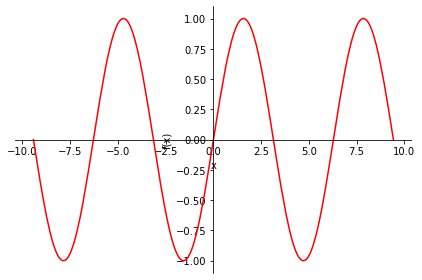

In [129]:
var('x y')
P=plot(sin(x),(x,-3*pi,3*pi),line_color="red")

## グラフの合成
先ほどのグラフに次のグラフを合成したグラフを表示してみましょう。

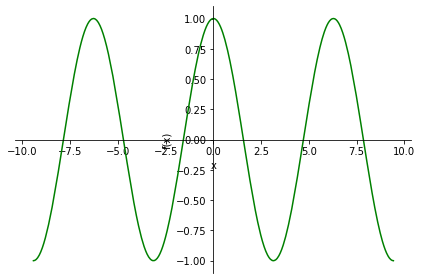

In [130]:
Q=plot(cos(x),(x,-3*pi,3*pi),line_color="green")

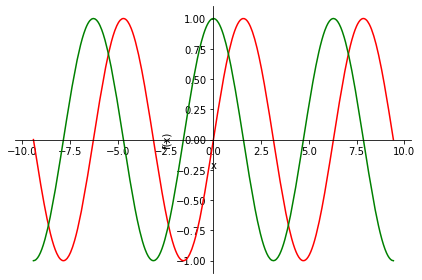

In [131]:
P.extend(Q)
P.show()

## 陰関数をプロットする
陰関数で定義される曲線を印刷することもできます。

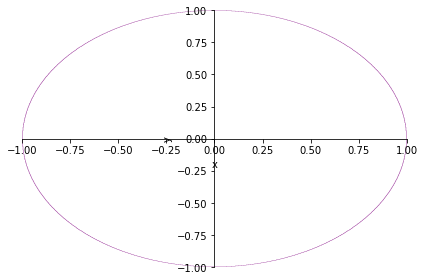

In [132]:
Q=plot_implicit(x**2+y**2-1, (x,-1,1),(y,-1,1),line_color="purple")

## パラメータ表示の曲線をプロットする

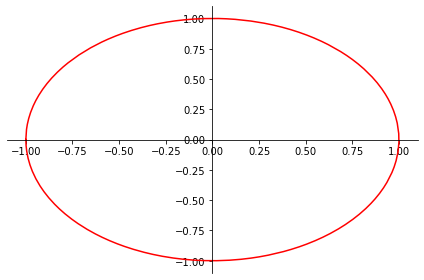

In [133]:
P=plot_parametric((cos(x),sin(x)), (x,-pi,pi),line_color="red")

## グラフの保存
作成したグラフを保存します。

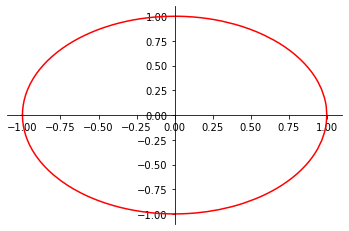

In [134]:
P.save('foo.png')

## 関数の級数展開(Taylor展開）
関数のTaylor級数展開を求めることも可能です。

In [135]:
sin(x).series(x,0,8) # x=0の周りで8次までの級数展開を求める。

x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)

異なる点($x=\frac{\pi}{2}$)の回りで展開してみましょう。

In [136]:
sin(x).series(x, x0=pi/2, n=8)

1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 - (x - pi/2)**6/720 + O((x - pi/2)**8, (x, pi/2))

In [137]:
cos(tan(x)).series(x,0,8)

1 - x**2/2 - 7*x**4/24 - 97*x**6/720 + O(x**8)

In [138]:
print(latex(cos(tan(x)).series(x,0,20)))

1 - \frac{x^{2}}{2} - \frac{7 x^{4}}{24} - \frac{97 x^{6}}{720} - \frac{2063 x^{8}}{40320} - \frac{17803 x^{10}}{1209600} - \frac{250781 x^{12}}{159667200} + \frac{166831871 x^{14}}{87178291200} + \frac{43685848289 x^{16}}{20922789888000} + \frac{447550424579 x^{18}}{304874938368000} + O\left(x^{20}\right)


級数どうしの積を求めてみます。

In [139]:
(sin(x).series(x,0,8)*cos(x).series(x,0,10)).expand()

x - 2*x**3/3 + 2*x**5/15 - 4*x**7/315 + O(x**8)

展開前の関数の積を展開しても同じ級数となります。

In [140]:
(sin(x)*cos(x)).series(x,0,8)

x - 2*x**3/3 + 2*x**5/15 - 4*x**7/315 + O(x**8)

In [141]:
(sin(2*x)/2).series(x,0,8)

x - 2*x**3/3 + 2*x**5/15 - 4*x**7/315 + O(x**8)

# 級数の和
無限級数の和を計算してみましょう。`oo`は無限大を表しています(`sympy.core.numbers.Infinity`)。

In [142]:
var('n x')
f=lambda n:1/n**n
S=Sum(f(n), (n, 1, oo))

In [143]:
S.evalf()

1.29128599706266

In [144]:
Integral(x**(-x), (x, 0,1 ))

Integral(x**(-x), (x, 0, 1))

In [145]:
_.evalf(50)

1.2912859970626635404072825905956005414986193682745

In [146]:
(Integral(exp(-x**2), (x, -oo, oo))**2).doit()

pi

## 部分分数展開
有理関数を部分分数展開してみます。

In [147]:
var('z')
expr=1/(z**2 + 3*z +2)
apart(expr)

-1/(z + 2) + 1/(z + 1)

`.apart()`メソッドも使えます。

In [148]:
expr.apart()

-1/(z + 2) + 1/(z + 1)

この様な展開はLaplace逆変換を求める際に便利です。

In [149]:
sympy.integrals.transforms.inverse_laplace_transform(expr, z, t)

(exp(t) - 1)*exp(-2*t)*Heaviside(t)

In [150]:
var('omega omega_0')
sympy.integrals.transforms.inverse_fourier_transform(1/(omega-omega_0),  omega,t)

InverseFourierTransform(1/(omega - omega_0), omega, t)

### collect, coeff
式の中の特定の変数について整理するときは`.collect()`を使います。その変数について特定の次数の係数を`.coeff()`メソッド
で取り出します。

In [151]:
expr=x**2-2*x+a*x*y - (y **3 - 3*x*y**2)
expr.simplify()

a*x*y + x**2 + 3*x*y**2 - 2*x - y**3

In [152]:
expr.collect(x)

x**2 + x*(a*y + 3*y**2 - 2) - y**3

In [153]:
collect(expr,y)

a*x*y + x**2 + 3*x*y**2 - 2*x - y**3

In [154]:
collect(expr,(y,x)).simplify().collect(x)

x**2 + x*(a*y + 3*y**2 - 2) - y**3

In [155]:
expr.coeff(x,1)

a*y + 3*y**2 - 2

## その他の役に立つ（かもしれない）`sympy`のサブモジュール
sympyには、古典／量子力学や高エネルギー物理学の様々な計算を支援するモジュール(sympy.phisics)や、
制御理論をサポートするsympy.physics.contorlなどのモジュールも存在します。(制御理論の数値的な取り扱いについては、
python-controlの方が便利だと思われますが）
詳しくは、[Web]で。

[Web]: https://docs.sympy.org/latest/modules/physics/index.html


In [156]:
import sympy.physics as Physics
if sympy.__version__ > "1.9":
    import sympy.pysics.control as control

これでおしまい。


以下はメモ書き

## sympyのクラス図を作ってみる。

In [157]:
%system pyreverse -p sympy -f PUB_ONLY -ASk --colorized --max-color-depth=8 -o png sympy.core.add sympy.core.mul  sympy.core.numbers

['parsing /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sympy/core/add.py...',
 'parsing /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sympy/core/mul.py...',
 'parsing /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sympy/core/numbers.py...']

[sympyのクラス図]: classes_sympy.png

![sympyのクラス図] (classes_sympy.png)

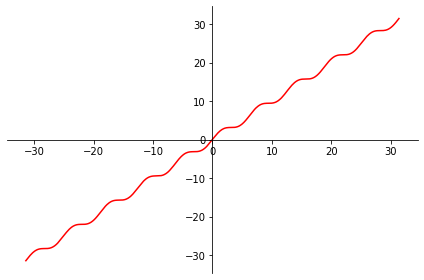

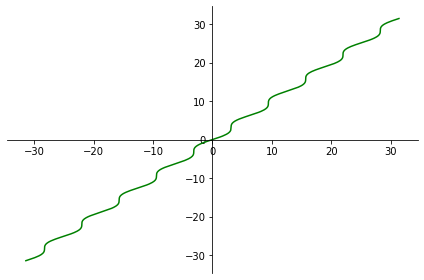

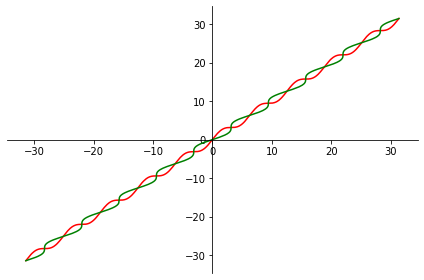

In [158]:
from sympy import *
var('x y t')
P=plot_parametric((t, t+sin(t)), (t,-10*pi,10*pi),line_color="red")
Q=plot_parametric((t+sin(t), t), (t,-10*pi,10*pi),line_color="green")
P.extend(Q)
P.show()

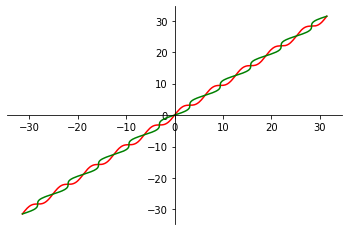

In [159]:
P.save('foo.png')

In [160]:
var("x_:2(:2) b_(:2)(:2)")
m=Matrix(( (x_00,x_01),
           (x_10,x_11))
      )
n=Matrix(((b_00,b_01),(b_10,b_11)))

In [161]:
det(m*n)

b_00*b_11*x_00*x_11 - b_00*b_11*x_01*x_10 - b_01*b_10*x_00*x_11 + b_01*b_10*x_01*x_10

In [162]:
det(m*n).factor()

(b_00*b_11 - b_01*b_10)*(x_00*x_11 - x_01*x_10)

In [163]:
m.transpose()

Matrix([
[x_00, x_10],
[x_01, x_11]])

In [164]:
import numpy
numpy.matrix

numpy.matrix

In [165]:
M=numpy.matrix(((a_00,a_01),(a_10,a_11)))
N=numpy.matrix(((b_00,b_01),(b_10,b_11)))

In [166]:
M*N

matrix([[a_00*b_00 + a_01*b_10, a_00*b_01 + a_01*b_11],
        [a_10*b_00 + a_11*b_10, a_10*b_01 + a_11*b_11]], dtype=object)

In [167]:
M+N

matrix([[a_00 + b_00, a_01 + b_01],
        [a_10 + b_10, a_11 + b_11]], dtype=object)

In [168]:
m+n

Matrix([
[b_00 + x_00, b_01 + x_01],
[b_10 + x_10, b_11 + x_11]])

In [169]:
var('x y')
solve(x**2+14*x + y**2 +49 , [x,y])

[(-I*y - 7, y), (I*y - 7, y)]

In [170]:
x,y = Symbol('x',real=True), Symbol('y',real=True)
solve( x**2+14*x + y**2 +49 , [x,y], dict=True)

[{x: -I*y - 7}, {x: I*y - 7}]

In [171]:
sympy.abc._clash

{'O': None,
 'Q': None,
 'N': None,
 'I': None,
 'E': None,
 'S': None,
 'beta': None,
 'zeta': None,
 'gamma': None,
 'pi': None}


次の連立方程式、
$$
\begin{cases}
\begin{array}{ll}
{y^{2}} &= x^{3} - 3 x^{2} + 2 x, \\
y^{3} - 3 y^{2} &= x^{2} - 2 x \\
\end{array}
\end{cases}
$$

を解いてみる。

まずは、`solve`を使ってみる。

In [172]:
from sympy import *
var('x y')
eqs=[Eq(y**2, x**3 - 3*x**2 +2*x), Eq(x**2-2*x ,y**3 - 3*y**2) ]
sols=solve(eqs, [x,y], dict=True)
sols

[{x: 0, y: 0},
 {x: 2, y: 0},
 {x: (-100430359332221*2**(2/3)*sqrt(321)*(3*sqrt(321) + 83)**(1/3) - 1799313569466781*2**(2/3)*(3*sqrt(321) + 83)**(1/3) - 10509656634114902 - 586586690687382*sqrt(321) + 738244296370706*2**(1/3)*(3*sqrt(321) + 83)**(2/3) + 41205380328146*2**(1/3)*sqrt(321)*(3*sqrt(321) + 83)**(2/3))/(-14331349955611230 - 799890941846430*sqrt(321) + 4110599705273*2**(1/3)*sqrt(321)*(3*sqrt(321) + 83)**(2/3) + 73655594558553*2**(1/3)*(3*sqrt(321) + 83)**(2/3) + 75878494479370*2**(2/3)*sqrt(321)*(3*sqrt(321) + 83)**(1/3) + 1359479401002570*2**(2/3)*(3*sqrt(321) + 83)**(1/3)),
  y: -(3*sqrt(321)/2 + 83/2)**(1/3)/3 - 10/(3*(3*sqrt(321)/2 + 83/2)**(1/3)) + 5/3},
 {x: (-123616140984438*sqrt(107)*2**(1/3)*(3*sqrt(321) + 83)**(2/3) - 738244296370706*2**(1/3)*sqrt(3)*(3*sqrt(321) + 83)**(2/3) - 301291077996663*sqrt(107)*2**(2/3)*(3*sqrt(321) + 83)**(1/3) - 1799313569466781*2**(2/3)*sqrt(3)*(3*sqrt(321) + 83)**(1/3) - 100430359332221*2**(2/3)*sqrt(321)*I*(3*sqrt(321) + 83)**(1/3) -

と解はでるが、どうやって解いたのかは解らないので一歩づつ進めてみる。
まず、第一式を第２式に代入し、yについて解いてみる。
方程式を因数分解してみやすい形にしておく。

In [173]:
eqs=factor(eqs)
eqs[0]

Eq(y**2, x*(x - 2)*(x - 1))

In [174]:
eqs[1]

Eq(x*(x - 2), y**2*(y - 3))

第一式を第二式に代入する。

In [175]:
factor(eqs[1].subs(eqs[0].lhs,eqs[0].rhs))

Eq(x*(x - 2), x*(x - 2)*(x - 1)*(y - 3))

これを解くと次のようになる。

In [176]:
sols_y=solve(factor(eqs[1].subs(eqs[0].lhs,eqs[0].rhs)),(x,y),dict=True)
sols_y

[{x: 0}, {x: 2}, {y: (3*x - 2)/(x - 1)}]

これらの解を第一式に代入すると、

In [177]:
[eqs[0].subs(sol) for sol in sols_y]

[Eq(y**2, 0), Eq(y**2, 0), Eq((3*x - 2)**2/(x - 1)**2, x*(x - 2)*(x - 1))]

In [178]:
[eqs[1].subs(sol) for sol in sols_y]

[Eq(0, y**2*(y - 3)),
 Eq(0, y**2*(y - 3)),
 Eq(x*(x - 2), (-3 + (3*x - 2)/(x - 1))*(3*x - 2)**2/(x - 1)**2)]

それぞれの場合に、これらの方程式の解を求める。

In [179]:
[solve(eqs[0].subs(sol),(x,y),dict=True) for sol in sols_y]

[[{y: 0}],
 [{y: 0}],
 [{x: 2 - sqrt(2)},
  {x: sqrt(2) + 2},
  {x: 1/3 + (-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3) - 8/(9*(-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3))},
  {x: 1/3 - 8/(9*(-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)},
  {x: -8/(9*(29/54 + sqrt(321)/18)**(1/3)) + 1/3 + (29/54 + sqrt(321)/18)**(1/3)}]]

$x=2$ および $x=2$ の場合はいずれも$y=0$が解となることがわかる。
$y=\frac{3 x -2}{x-1}$の場合には、$x$として五個の解がある。これをもう少し調べてみる。
$x\ne0$かつ$x\ne2$の時の$x,y$の関係を求める。


これを方程式の第１式に代入して、整理してみる。

In [180]:
eq0=eqs[0].subs(sols_y[-1]).simplify()
expr0=eq0.lhs-eq0.rhs
num,den=expr0.as_numer_denom()
expr0 *=den
expr0=expr0.factor()
print(latex(expr0))
expr0

\left(x^{2} - 4 x + 2\right) \left(x^{3} - x^{2} + 3 x - 2\right)


(x**2 - 4*x + 2)*(x**3 - x**2 + 3*x - 2)

第２式に代入しても同じ式にたどり着く。

In [181]:
eq1=eqs[1].subs(sols_y[-1]).simplify()
expr1=eq1.lhs-eq1.rhs
num,den=expr1.as_numer_denom()

In [182]:
expr1 *=den
expr1=expr1.factor()
expr1

(x**2 - 4*x + 2)*(x**3 - x**2 + 3*x - 2)

$\left(x^{2} - 4 x + 2\right) = 0$ および $\left(x^{3} - x^{2} + 3 x - 2\right)=0$ をそれぞれ解いて、
$y$を$y=\frac{3 x -2}{x-1}$で求めれば、全ての解が確定する。

`.args`をつかって、因数の各項を取り出せる。これらが0となる解をそれぞれ求める。

In [183]:
expr1.args

(x**2 - 4*x + 2, x**3 - x**2 + 3*x - 2)

In [184]:
var('x')
sol1=solve(Eq(expr1.args[0],0),x)
sol1

[2 - sqrt(2), sqrt(2) + 2]

これらの解を、$y=(3 x -2)/(x-1)$に代入して、元の方程式の解 $ x, y$を求める。

In [185]:
sol1_y=[{x:x1, y:((3*x1-2)/(x1-1)).simplify()} for x1 in sol1]
sol1_y

[{x: 2 - sqrt(2), y: 2 - sqrt(2)}, {x: sqrt(2) + 2, y: sqrt(2) + 2}]

`expr1`の因数の後半から、

In [186]:
var('x')
sol2=solve(Eq(expr1.args[1],0),x)
sol2

[1/3 + (-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3) - 8/(9*(-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)),
 1/3 - 8/(9*(-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3),
 -8/(9*(29/54 + sqrt(321)/18)**(1/3)) + 1/3 + (29/54 + sqrt(321)/18)**(1/3)]

$x,\,y$のペアを作成

In [187]:
sol2_y=[{x:x1, y:((3*x1-2)/(x1-1)).simplify()} for x1 in sol2]
sol2_y

[{x: 1/3 + (-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3) - 8/(9*(-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)),
  y: 3*(-64*2**(1/3) + (1 + sqrt(3)*I)*(4 + 2**(2/3)*(1 + sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))/(-64*2**(1/3) + (1 + sqrt(3)*I)*(8 + 2**(2/3)*(1 + sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))},
 {x: 1/3 - 8/(9*(-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3),
  y: 3*(-64*2**(1/3) + (1 - sqrt(3)*I)*(4 + 2**(2/3)*(1 - sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))/(-64*2**(1/3) + (1 - sqrt(3)*I)*(8 + 2**(2/3)*(1 - sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))},
 {x: -8/(9*(29/54 + sqrt(321)/18)**(1/3)) + 1/3 + (29/54 + sqrt(321)/18)**(1/3),
  y: 3*((29 + 3*sqrt(321))**(1/3)*(-2**(2/3)*(29 + 3*sqrt(321))**(1/3) + 2) + 16*2**(1/3))/((29 + 3*sqrt(321))**(1/3)*(-2**(2/3)*(29 + 3*sqrt(321))**(1/3) + 4) + 16*2**(1/3))}]

In [188]:
solutions=sol1_y+sol2_y
solutions

[{x: 2 - sqrt(2), y: 2 - sqrt(2)},
 {x: sqrt(2) + 2, y: sqrt(2) + 2},
 {x: 1/3 + (-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3) - 8/(9*(-1/2 - sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)),
  y: 3*(-64*2**(1/3) + (1 + sqrt(3)*I)*(4 + 2**(2/3)*(1 + sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))/(-64*2**(1/3) + (1 + sqrt(3)*I)*(8 + 2**(2/3)*(1 + sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))},
 {x: 1/3 - 8/(9*(-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(29/54 + sqrt(321)/18)**(1/3),
  y: 3*(-64*2**(1/3) + (1 - sqrt(3)*I)*(4 + 2**(2/3)*(1 - sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))/(-64*2**(1/3) + (1 - sqrt(3)*I)*(8 + 2**(2/3)*(1 - sqrt(3)*I)*(29 + 3*sqrt(321))**(1/3))*(29 + 3*sqrt(321))**(1/3))},
 {x: -8/(9*(29/54 + sqrt(321)/18)**(1/3)) + 1/3 + (29/54 + sqrt(321)/18)**(1/3),
  y: 3*((29 + 3*sqrt(321))**(1/3)*(-2**(2/3)*(29 + 3*sqrt(321))**(1/3) + 2) + 16*2**(1/3))/((29 + 3*sqrt(321))**(1/3)*(-2**

解が方程式を満たしていることを確認する。

In [189]:
check0=eqs[0].subs(sols_y[2]).simplify()
check0

Eq(x*(x - 2)*(x - 1), (3*x - 2)**2/(x - 1)**2)

In [190]:
[check0.subs(r, simultaneous=True).simplify() for r in solutions]

[True, True, True, True, True]

In [191]:
check1=eqs[1].subs(sols_y[2]).simplify()
check1

Eq(x*(x - 2), (3*x - 2)**2/(x - 1)**3)

In [192]:
[check1.subs(r, simultaneous=True).simplify() for r in solutions]

[True, True, True, True, True]

式 $x^3 - x^2 + 3 x - 2 = 0$ は $x\rightarrow x+\frac{1}{3}$ を行うことで, カルダノの公式の標準形に変換できる。

In [193]:
(x**3 - x**2 + 3*x - 2).subs(x,x+Rational(1,3)).expand().collect(x)

x**3 + 8*x/3 - 29/27

In [194]:
solutions[-1][x].expand().simplify()

-8*2**(1/3)/(3*(29 + 3*sqrt(321))**(1/3)) + 1/3 + 2**(2/3)*(29 + 3*sqrt(321))**(1/3)/6

In [195]:
p=Rational(8,3);q=-Rational(29,27)
u3=-q/2+sqrt((q/2)**2+(p/3)**3)
v3=-q/2-sqrt((q/2)**2+(p/3)**3)
(-q/2+sqrt((q/2)**2+(p/3)**3)).simplify()

29/54 + sqrt(321)/18

In [196]:
(u3+v3).expand().simplify(),factor((u3*v3-(-p/3)**3).expand().simplify())

(29/27, 0)

In [197]:
(u3**(Rational(1,3)).simplify() + ((-p/3)*u3**Rational(-1,3)).simplify())

-8*2**(1/3)/(3*(29 + 3*sqrt(321))**(1/3)) + (29/54 + sqrt(321)/18)**(1/3)

In [198]:
factorint(512),factorint(729)

({2: 9}, {3: 6})

In [199]:
solutions[-1][x].as_real_imag()

(-8/(9*(29/54 + sqrt(321)/18)**(1/3)) + 1/3 + (29/54 + sqrt(321)/18)**(1/3), 0)

In [200]:
var('omega')
sols[2][x].as_real_imag()

((-100430359332221*2**(2/3)*sqrt(321)*(3*sqrt(321) + 83)**(1/3) - 1799313569466781*2**(2/3)*(3*sqrt(321) + 83)**(1/3) - 10509656634114902 - 586586690687382*sqrt(321) + 738244296370706*2**(1/3)*(3*sqrt(321) + 83)**(2/3) + 41205380328146*2**(1/3)*sqrt(321)*(3*sqrt(321) + 83)**(2/3))/(-14331349955611230 - 799890941846430*sqrt(321) + 4110599705273*2**(1/3)*sqrt(321)*(3*sqrt(321) + 83)**(2/3) + 73655594558553*2**(1/3)*(3*sqrt(321) + 83)**(2/3) + 75878494479370*2**(2/3)*sqrt(321)*(3*sqrt(321) + 83)**(1/3) + 1359479401002570*2**(2/3)*(3*sqrt(321) + 83)**(1/3)),
 0)

これらの解は数値的には0と見做せる小さな違いを除いて一致している。

In [201]:
N(sols[2][x]-solutions[-1][x])

-0.e-125

In [202]:
N(sols[3][x]-solutions[-2][x])

0.e-130 - 0.e-131*I

In [203]:
N(sols[4][x]-solutions[2][x])

0.e-130 + 0.e-131*I

In [204]:
factorint(14331349955611230)

{2: 1, 3: 1, 5: 1, 17: 1, 31: 1, 47: 1, 19286675489: 1}

In [205]:
factorint(799890941846430)

{2: 1, 3: 2, 5: 1, 7: 1, 83: 1, 241: 1, 4889: 1, 12983: 1}

In [206]:
((29+3*sqrt(321))*(3*sqrt(321)-29)).expand().simplify()

2048

In [207]:
160646206240*3/8953569504

53.82642291487147

In [208]:
omega=exp(2*I*pi/3)
omega**2

exp(-2*I*pi/3)

In [209]:
(1+omega+omega**2).simplify()

1 - (-1)**(1/3) + exp(2*I*pi/3)

In [210]:
expr=(x+y+z)*(x+omega*y+omega**2*z)*(x+omega**2*y+omega*z)
print(expr.expand().simplify())

-(-1)**(1/3)*(x**2*y + x**2*z + x*y**2 + 3*x*y*z + x*z**2 + y**2*z + y*z**2 + (-1)**(2/3)*(x**3 + x**2*y + (-1)**(2/3)*x**2*y + x**2*z + (-1)**(2/3)*x**2*z + x*y**2 + (-1)**(2/3)*x*y**2 + 3*(-1)**(2/3)*x*y*z + x*z**2 + (-1)**(2/3)*x*z**2 + y**3 + y**2*z + (-1)**(2/3)*y**2*z + y*z**2 + (-1)**(2/3)*y*z**2 + z**3))


In [211]:
print(expr.expand().simplify().collect(x))

-(-1)**(1/3)*(x**2*(y + z) + x*(y**2 + 3*y*z + z**2) + y**2*z + y*z**2 + (-1)**(2/3)*(x**3 + x**2*(y + (-1)**(2/3)*y + z + (-1)**(2/3)*z) + x*(y**2 + (-1)**(2/3)*y**2 + 3*(-1)**(2/3)*y*z + z**2 + (-1)**(2/3)*z**2) + y**3 + y**2*z + (-1)**(2/3)*y**2*z + y*z**2 + (-1)**(2/3)*y*z**2 + z**3))


In [212]:
(x**3 + y**3 + z**3 - 3*x*y*z).factor()

(x + y + z)*(x**2 - x*y - x*z + y**2 - y*z + z**2)

In [213]:
var('omega x y z p q')
expr=(x+omega*y+z*omega**2)*(x+y*omega**2+omega*z);
expr.expand().subs({omega**4:omega,omega**3:1,}).subs({omega**2:-1-omega}).simplify()

x**2 - x*y - x*z + y**2 - y*z + z**2

In [214]:
solve([Eq((-p/3)**3,y**3*z**3),Eq(q,y**3+z**3)],(y**3,z**3),dict=True)

[{y**3: q/2 - sqrt(3)*sqrt(4*p**3 + 27*q**2)/18,
  z**3: q/2 + sqrt(3)*sqrt(4*p**3 + 27*q**2)/18},
 {y**3: q/2 + sqrt(3)*sqrt(4*p**3 + 27*q**2)/18,
  z**3: q/2 - sqrt(3)*sqrt(4*p**3 + 27*q**2)/18}]

In [215]:
solve(Eq(y**3+(-p/3)**3/y**3,q),y**3,dict=True)

[{y**3: q/2 - sqrt(12*p**3 + 81*q**2)/18},
 {y**3: q/2 + sqrt(12*p**3 + 81*q**2)/18}]

$y^3= \left(q/2+\sqrt{12 p^3+81 q^2}/18\right)$は1の複素3乗根を$\omega$として、
$y = y_0, \omega y_0, \omega^2 y_0$ ただし、$y_0=(q/2-\sqrt(12 p^3+81 q^2)/18)^{1/3}$.
此の時、$z$は$z=(-p/3)/y_0, (-p/3)/y_0 \omega^2, (-p/3)/y_0 \omega$ということになる。

$z_0= (-p/3)/y_0=

In [216]:
y_0=(q/2-sqrt(12*p**3+81*q**2)/18)**(Integer(1)/Integer(3))
z_0=(q/2+sqrt(12*p**3+81*q**2)/18)**(Integer(1)/Integer(3))
((y_0**3*z_0**3).expand())**(Integer(1)/Integer(3))

(-p**3)**(1/3)/3

In [217]:
help(z_0.expand)

Help on method expand in module sympy.core.expr:

expand(deep=True, modulus=None, power_base=True, power_exp=True, mul=True, log=True, multinomial=True, basic=True, **hints) method of sympy.core.power.Pow instance
    Expand an expression using hints.
    
    See the docstring of the expand() function in sympy.core.function for
    more information.



In [218]:
(z_0/(q/2+sqrt(12*p**3+81*q**2)/18)**(Integer(1)/Integer(3))).expand(deep=True)

1

In [219]:
expr.expand().simplify()

omega**4*y*z + omega**3*y**2 + omega**3*z**2 + omega**2*x*y + omega**2*x*z + omega**2*y*z + omega*x*y + omega*x*z + x**2

In [220]:
from sympy import *
var('x k y')
expr=(k+1)*x**2+k*x-2*k 
sols=solve(expr,x,dict=True)
solve(Eq( x.subs(sols[0]), x.subs(sols[1])),k,dict=True)

[{k: -8/9}, {k: 0}]

In [221]:
from sympy import *
var('x k y')
expr=(k+1)*x**2+k*x-2*k 
sols=solve(expr, x)
solve(Eq(sols[0], sols[1]), k, dict=True)

[{k: -8/9}, {k: 0}]

In [222]:
((29 +3*sqrt(321))**5).expand().simplify()

1935325904 + 108537648*sqrt(321)

In [223]:
factorint(23631496),factorint(108537648)

({2: 3, 7: 1, 17: 1, 103: 1, 241: 1}, {2: 4, 3: 1, 1171: 1, 1931: 1})

In [224]:
factorint(3730)

{2: 1, 5: 1, 373: 1}

In [225]:
((29 +3*sqrt(321))**3).expand().simplify()

275732 + 16236*sqrt(321)

In [226]:
factorint(275732), factorint(16236)

({2: 2, 29: 1, 2377: 1}, {2: 2, 3: 2, 11: 1, 41: 1})